# Scikit-Learn (CPU) version of Demo-1

On the smaller dataset, the times will be similar. Check out how the times differ between GPU computations and CPU computations on the large dataset.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
%%time
df_pandas = pd.read_csv('Data/train_validate_10_final.csv') # A much smaller dataset
#df_pandas = pd.read_csv('Data/aviris_bands_extract_final.csv') # Read the csv into a pandas DataFrame

In [5]:
df_pandas.head(5)

,depth_m,b59_ang201,b60_ang201,b61_ang201,b62_ang201,b65_ang201,b67_ang201,b73_ang201,b74_ang201,b76_ang201,b78_ang201
0,0.766572,0.033982,0.033714,0.032013,0.031970,0.027843,0.024982,0.013986,0.014606,0.014061,0.014546
1,0.717804,0.033982,0.033714,0.032013,0.031970,0.027843,0.024982,0.013986,0.014606,0.014061,0.014546
2,0.859536,0.026502,0.026912,0.025114,0.025549,0.021589,0.020254,0.011279,0.011378,0.011042,0.011603
3,0.777240,0.027229,0.027591,0.025464,0.024831,0.021866,0.020672,0.012735,0.012505,0.012746,0.012870
4,0.649224,0.031175,0.031153,0.030272,0.029274,0.025335,0.023088,0.010361,0.011387,0.011305,0.011338


In [6]:
training_predictors = df_pandas['depth_m']
covariates = df_pandas.drop(['depth_m'], axis=1)

In [7]:
training_predictors.describe()

count    5243.000000
mean        1.373884
std         0.429527
min         0.470408
25%         1.099565
50%         1.475230
75%         1.743460
max         2.097020
Name: depth_m, dtype: float64

In [8]:
%%time

covariates.describe()

CPU times: user 27.9 ms, sys: 5.63 ms, total: 33.6 ms
Wall time: 31 ms


,b59_ang201,b60_ang201,b61_ang201,b62_ang201,b65_ang201,b67_ang201,b73_ang201,b74_ang201,b76_ang201,b78_ang201
count,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000
mean,0.031550,0.031185,0.029731,0.029375,0.026706,0.024247,0.013804,0.014180,0.014116,0.014009
std,0.004561,0.004575,0.004461,0.004481,0.004184,0.004098,0.003248,0.003330,0.003392,0.003391
min,0.022300,0.022247,0.021359,0.020706,0.017501,0.015925,0.004294,0.004750,0.004613,0.003249
25%,0.028299,0.027867,0.026529,0.026120,0.023692,0.021381,0.012834,0.013126,0.013113,0.013022
50%,0.030487,0.030170,0.028726,0.028313,0.025637,0.023053,0.013932,0.014245,0.014120,0.013994
75%,0.033626,0.033244,0.031814,0.031538,0.028830,0.026363,0.015050,0.015408,0.015316,0.015153
max,0.051969,0.051937,0.052641,0.053870,0.066151,0.079642,0.105788,0.107176,0.112849,0.115969


In [9]:
X_train, X_test, y_train, y_test = train_test_split(covariates, 
                                                    training_predictors, 
                                                    shuffle=True, 
                                                    train_size = 0.8)

In [10]:
print('Training features shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Testing features shape: ', X_test.shape)
print('Testing labels shape: ', y_test.shape)

Training features shape:  (4194, 10)
Training labels shape:  (4194,)
Testing features shape:  (1049, 10)
Testing labels shape:  (1049,)


In [12]:
%%time

sk_model = rfr(n_estimators=1000,
                  max_depth = 50,
                  max_features = 'auto',
                  random_state = 42)

sk_model.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 191 ms, total: 30.7 s
Wall time: 30.7 s


RandomForestRegressor(max_depth=50, n_estimators=1000, random_state=42)

In [13]:
%%time

predictions = sk_model.predict(X_test)

mae_cuml_model = mean_squared_error(y_test, predictions)
r2_cuml_model = r2_score(y_test, predictions)

CPU times: user 339 ms, sys: 59.9 ms, total: 399 ms
Wall time: 396 ms


In [16]:
filename = 'Models/sklearn_aviris_random_forest.sav'
# Save the trained model into a file
joblib.dump(sk_model, open(filename, 'wb'))
# Delete the previous model to ensure there is no leakage of pointers. 
del sk_model
# Load the saved pre-trained model from a file
saved_sk_model = joblib.load(open(filename, 'rb'))

In [17]:
%%time 

prediction_post_save = saved_sk_model.predict(X_test)

mae_post_save = mean_squared_error(y_test, prediction_post_save)
r2_post_save = r2_score(y_test, prediction_post_save)

CPU times: user 331 ms, sys: 1.21 ms, total: 332 ms
Wall time: 331 ms


In [18]:
print('SK mean absolute error of RF model before saving: %s' % mae_cuml_model)
print('SK mean absolute error of RF model after saving: %s' % mae_post_save)

print('SK r^2 score of RF model before saving: %s' % r2_cuml_model)
print('SK r^2 score of RF model after saving: %s' % r2_post_save)

SK mean absolute error of RF model before saving: 0.03934550635187194
SK mean absolute error of RF model after saving: 0.03934550635187194
SK r^2 score of RF model before saving: 0.7884370616906037
SK r^2 score of RF model after saving: 0.7884370616906037


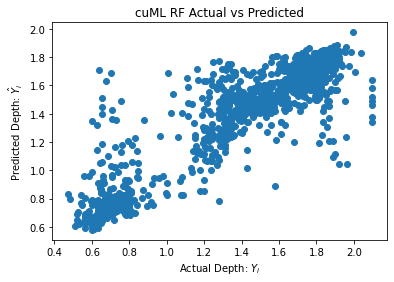

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Depth: $Y_i$")
plt.ylabel("Predicted Depth: $\hat{Y}_i$")
plt.title("Scikit RF Actual vs Predicted")
plt.show()

In [26]:
%%time

perm_imp = permutation_importance(saved_sk_model, X_test, y_test)
spectral_bands_list = list(covariates.columns)
importances = perm_imp.importances_mean
feature_importances = [(feature, (round(importance, 5))) for
                      feature, importance in zip(spectral_bands_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
_ = [print('Variables: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variables: b67_ang201           Importance: 0.30912
Variables: b76_ang201           Importance: 0.22535
Variables: b78_ang201           Importance: 0.22071
Variables: b73_ang201           Importance: 0.17846
Variables: b59_ang201           Importance: 0.15169
Variables: b60_ang201           Importance: 0.12208
Variables: b65_ang201           Importance: 0.09009
Variables: b74_ang201           Importance: 0.07951
Variables: b61_ang201           Importance: 0.07601
Variables: b62_ang201           Importance: 0.04997
CPU times: user 13.5 s, sys: 107 ms, total: 13.6 s
Wall time: 13.6 s
